In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Define the path to the file in Downloads
file_path = os.path.expanduser('~/Downloads/Time Interval Data Drilling.csv')

# Load the CSV file
drilling_data = pd.read_csv(file_path)

# Display the first few rows
print(drilling_data.head())

# Get basic info about the dataset
print(drilling_data.info())

             Time  Weight on Bit  ROP Depth/Hour  Top Drive RPM  \
0  11/06/20 16:57       44.55800        15.11823       69.98977   
1  11/06/20 16:57       43.75323         0.00000       70.23128   
2  11/06/20 16:57       44.06947        24.13553       69.72813   
3  11/06/20 16:57       43.99326         0.00000       69.96964   
4  11/06/20 16:57       43.88887         0.00000       69.80863   

   Top Drive Torque (ft-lbs)    Flow In  Pump Pressure  SPM Total  \
0                  4528.3360  742.05090      2272.6392  177.38834   
1                  4457.4663  745.35645      2245.3503  178.17853   
2                  4564.7830  742.60590      2249.2195  177.52101   
3                  4645.7770  742.59450      2332.8137  177.51830   
4                  4771.3174  742.60590      2244.6052  177.52101   

   Pit Volume Active    Bit RPM  Depth Hole TVD  Differential Pressure  \
0          493.84955  185.00766       4297.5480              243.11200   
1          494.05420  185.76154   

/var/folders/yw/z5q5_d9503l1qdll923f2s840000gn/T/ipykernel_27718/2263842887.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  drilling_data = pd.read_csv(file_path)


In [5]:
drilling_data = pd.read_csv(file_path, low_memory=False)

In [9]:
# Drop rows where 'Time' is NaT
drilling_data_cleaned = drilling_data.dropna(subset=['Time'])

# Reset the index
drilling_data_cleaned.reset_index(drop=True, inplace=True)

# Print the number of rows after cleaning
print(f"Number of valid rows: {len(drilling_data_cleaned)}")

Number of valid rows: 998


In [11]:
# Display basic information about the cleaned data
print(drilling_data_cleaned.info())

# Display a preview of the cleaned data
print(drilling_data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Time                       998 non-null    datetime64[ns]
 1   Weight on Bit              998 non-null    float64       
 2   ROP Depth/Hour             998 non-null    float64       
 3   Top Drive RPM              998 non-null    float64       
 4   Top Drive Torque (ft-lbs)  998 non-null    float64       
 5   Flow In                    998 non-null    float64       
 6   Pump Pressure              998 non-null    float64       
 7   SPM Total                  998 non-null    float64       
 8   Pit Volume Active          998 non-null    float64       
 9   Bit RPM                    998 non-null    float64       
 10  Depth Hole TVD             998 non-null    float64       
 11  Differential Pressure      998 non-null    float64       
 12  Downhole

In [13]:
output_path = os.path.expanduser('~/Downloads/Cleaned_Time_Interval_Data.csv')
drilling_data_cleaned.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: /Users/apple/Downloads/Cleaned_Time_Interval_Data.csv


In [15]:
# Convert 'Time' with a specified format
drilling_data['Time'] = pd.to_datetime(drilling_data['Time'], format='%d/%m/%y %H:%M', errors='coerce')

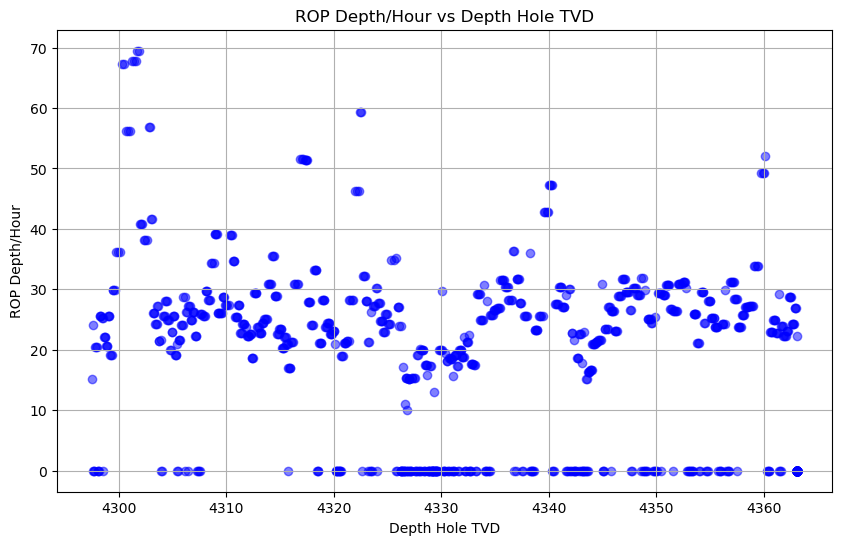

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(drilling_data_cleaned['Depth Hole TVD'], drilling_data_cleaned['ROP Depth/Hour'], alpha=0.5, color='blue')
plt.title('ROP Depth/Hour vs Depth Hole TVD')
plt.xlabel('Depth Hole TVD')
plt.ylabel('ROP Depth/Hour')
plt.grid(True)
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [20]:
# Load the cleaned dataset
file_path = '~/Downloads/Cleaned_Time_Interval_Data.csv'
data = pd.read_csv(file_path)

# Define features and target
X = data[['Weight on Bit', 'Top Drive RPM', 'Top Drive Torque (ft-lbs)', 'Flow In',
          'Pump Pressure', 'SPM Total', 'Bit RPM', 'Depth Hole TVD',
          'Differential Pressure', 'Downhole Torque', 'MUD TEMP']]
y = data['ROP Depth/Hour']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset summary
print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")

Training size: (798, 11), Testing size: (200, 11)


In [23]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

Mean Squared Error (MSE): 101.47
R-squared Score (R²): 0.48


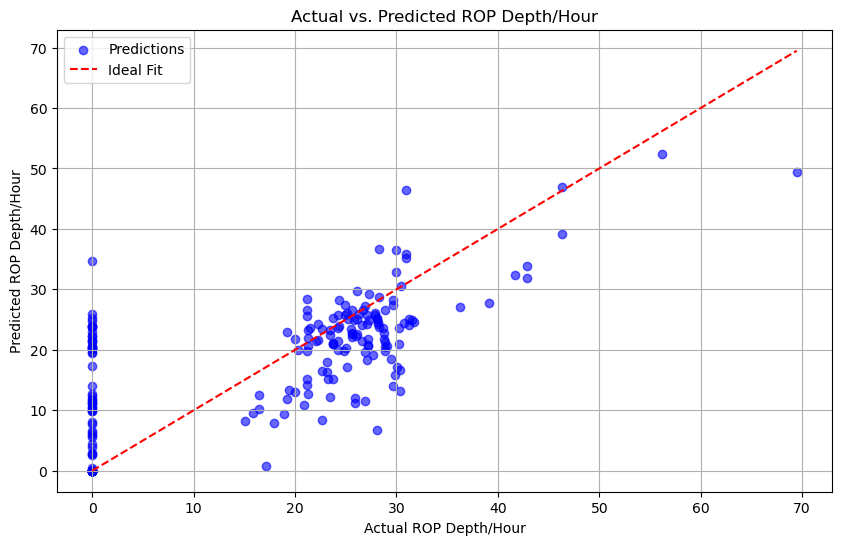

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Fit')
plt.title('Actual vs. Predicted ROP Depth/Hour')
plt.xlabel('Actual ROP Depth/Hour')
plt.ylabel('Predicted ROP Depth/Hour')
plt.legend()
plt.grid(True)
plt.show()

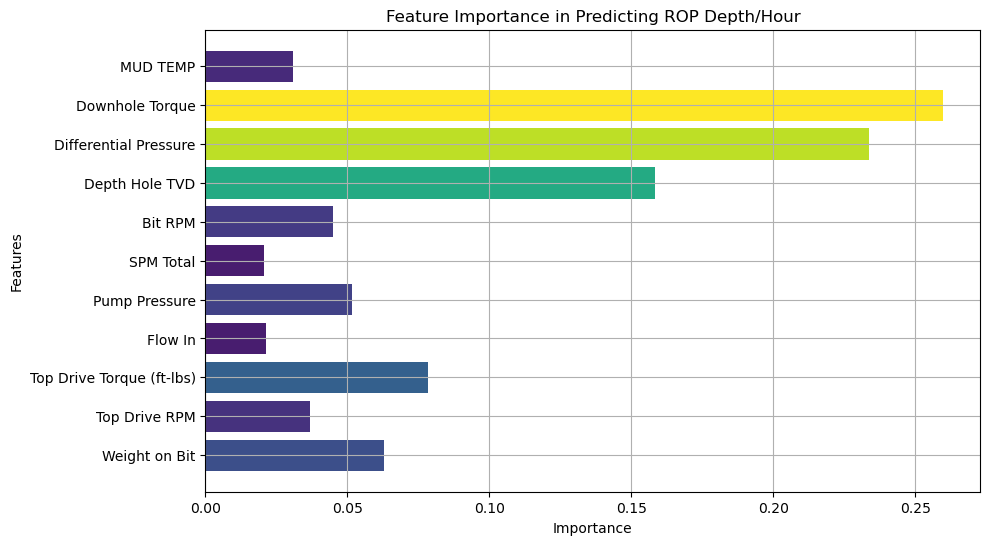

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color=plt.cm.viridis(importance / max(importance)))
plt.title('Feature Importance in Predicting ROP Depth/Hour')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

In [37]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.4 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"XGBoost R-squared Score (R²): {r2_xgb:.2f}")

XGBoost Mean Squared Error (MSE): 100.93
XGBoost R-squared Score (R²): 0.48


In [41]:
# Store model results
model_results = {}

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
model_results['Random Forest'] = {
    'mse': mean_squared_error(y_test, y_pred_rf),
    'r2': r2_score(y_test, y_pred_rf)
}

# XGBoost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
model_results['XGBoost'] = {
    'mse': mean_squared_error(y_test, y_pred_xgb),
    'r2': r2_score(y_test, y_pred_xgb)
}

# Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()
model_results['Neural Network'] = {
    'mse': mean_squared_error(y_test, y_pred_nn),
    'r2': r2_score(y_test, y_pred_nn)
}

# Display model results
for model_name, results in model_results.items():
    print(f"{model_name}: MSE = {results['mse']:.2f}, R² = {results['r2']:.2f}")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Random Forest: MSE = 101.19, R² = 0.48
XGBoost: MSE = 100.93, R² = 0.48
Neural Network: MSE = 1192.79, R² = -5.11


In [43]:
from tensorflow.keras.layers import Input

nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [45]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1)
])

In [47]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

history = nn_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

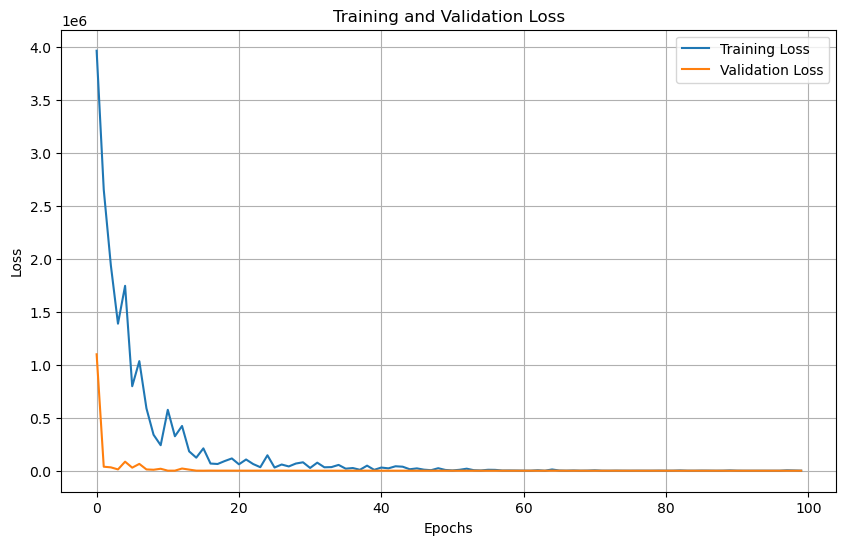

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define base models
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
]

# Define meta-model
meta_model = LinearRegression()

# Create Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)

# Evaluate the model
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f"Stacking Model: MSE = {mse_stack:.2f}, R² = {r2_stack:.2f}")

Stacking Model: MSE = 100.23, R² = 0.49


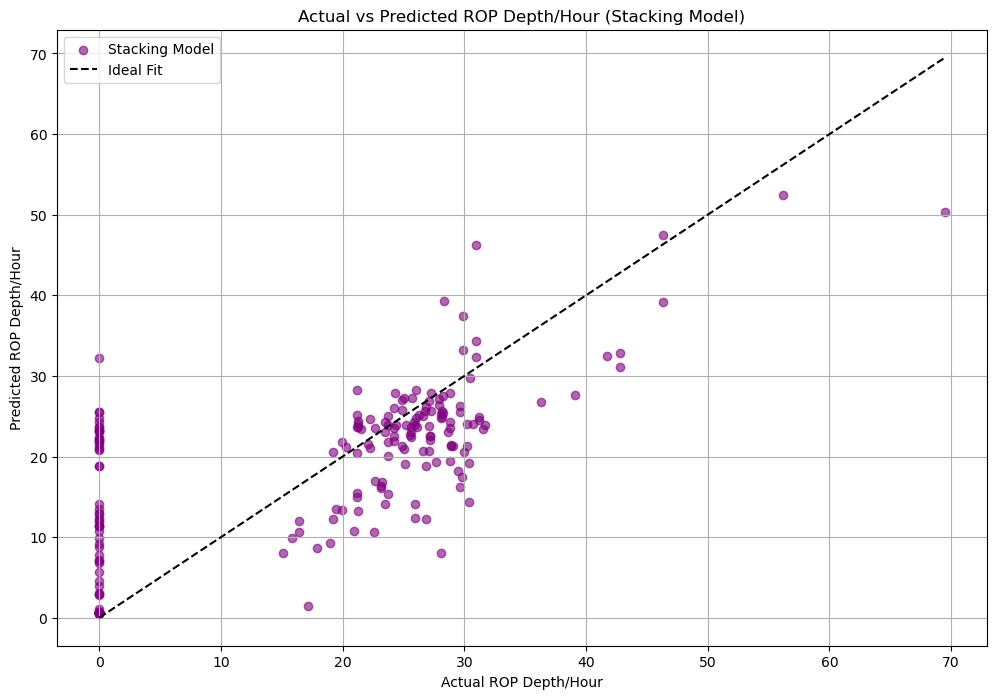

In [53]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_stack, alpha=0.6, color='purple', label='Stacking Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal Fit')
plt.title('Actual vs Predicted ROP Depth/Hour (Stacking Model)')
plt.xlabel('Actual ROP Depth/Hour')
plt.ylabel('Predicted ROP Depth/Hour')
plt.legend()
plt.grid(True)
plt.show()

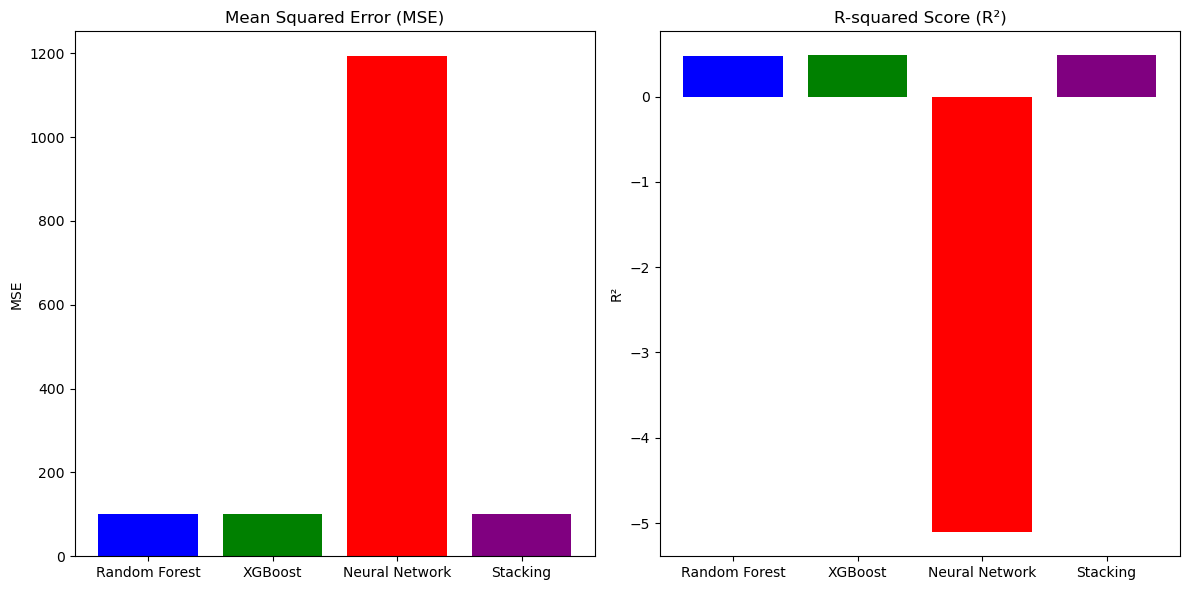

In [55]:
# Compile results
model_names = ['Random Forest', 'XGBoost', 'Neural Network', 'Stacking']
mse_scores = [model_results['Random Forest']['mse'], model_results['XGBoost']['mse'], model_results['Neural Network']['mse'], mse_stack]
r2_scores = [model_results['Random Forest']['r2'], model_results['XGBoost']['r2'], model_results['Neural Network']['r2'], r2_stack]

plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_scores, color=['blue', 'green', 'red', 'purple'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Plot R²
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_scores, color=['blue', 'green', 'red', 'purple'])
plt.title('R-squared Score (R²)')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

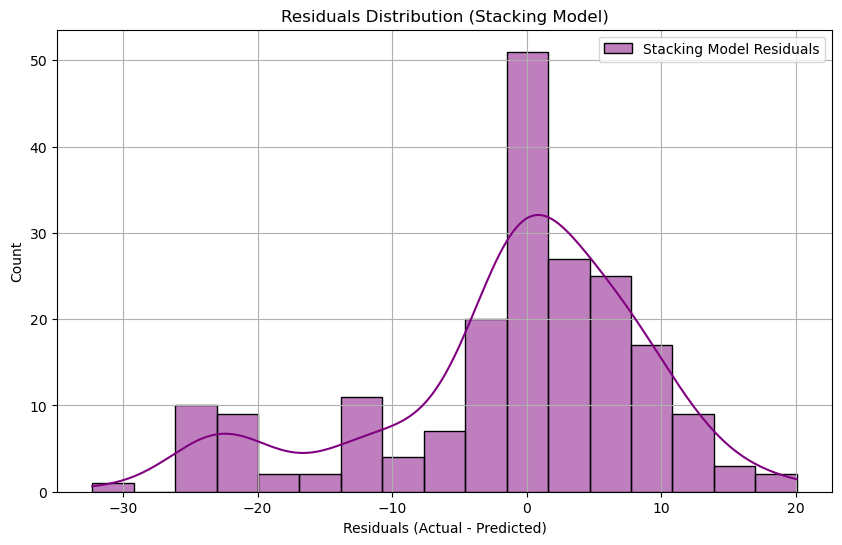

In [57]:
residuals_stack = y_test - y_pred_stack

plt.figure(figsize=(10, 6))
sns.histplot(residuals_stack, kde=True, color='purple', label='Stacking Model Residuals')
plt.title('Residuals Distribution (Stacking Model)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV

# Random Forest Hyperparameter Grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest Params:", rf_grid.best_params_)

# XGBoost Hyperparameter Grid
xgb_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8]
}

xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=3, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_grid.best_params_)

Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}


In [61]:
from sklearn.linear_model import Ridge

# Create the stacking regressor with tuned base models
tuned_base_models = [
    ('random_forest', rf_grid.best_estimator_),
    ('xgboost', xgb_grid.best_estimator_)
]

meta_params = {'alpha': [0.1, 1.0, 10.0]}

stacking_meta_grid = GridSearchCV(
    StackingRegressor(estimators=tuned_base_models, final_estimator=Ridge(), cv=5),
    param_grid={'final_estimator__alpha': meta_params['alpha']},
    cv=3,
    scoring='r2',
    n_jobs=-1
)

stacking_meta_grid.fit(X_train, y_train)

# Best Stacking Parameters
print("Best Stacking Meta-Model Params:", stacking_meta_grid.best_params_)

Best Stacking Meta-Model Params: {'final_estimator__alpha': 0.1}


In [63]:
# Generate predictions for each model
weights = {'random_forest': 0.4, 'xgboost': 0.4, 'stacking': 0.2}  # Example weights

y_pred_blended = (
    weights['random_forest'] * rf_grid.best_estimator_.predict(X_test) +
    weights['xgboost'] * xgb_grid.best_estimator_.predict(X_test) +
    weights['stacking'] * stacking_meta_grid.best_estimator_.predict(X_test)
)

# Evaluate blended model
mse_blend = mean_squared_error(y_test, y_pred_blended)
r2_blend = r2_score(y_test, y_pred_blended)

print(f"Blended Model: MSE = {mse_blend:.2f}, R² = {r2_blend:.2f}")

Blended Model: MSE = 99.60, R² = 0.49


/var/folders/yw/z5q5_d9503l1qdll923f2s840000gn/T/ipykernel_27718/130183927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance, y=features, palette='viridis')


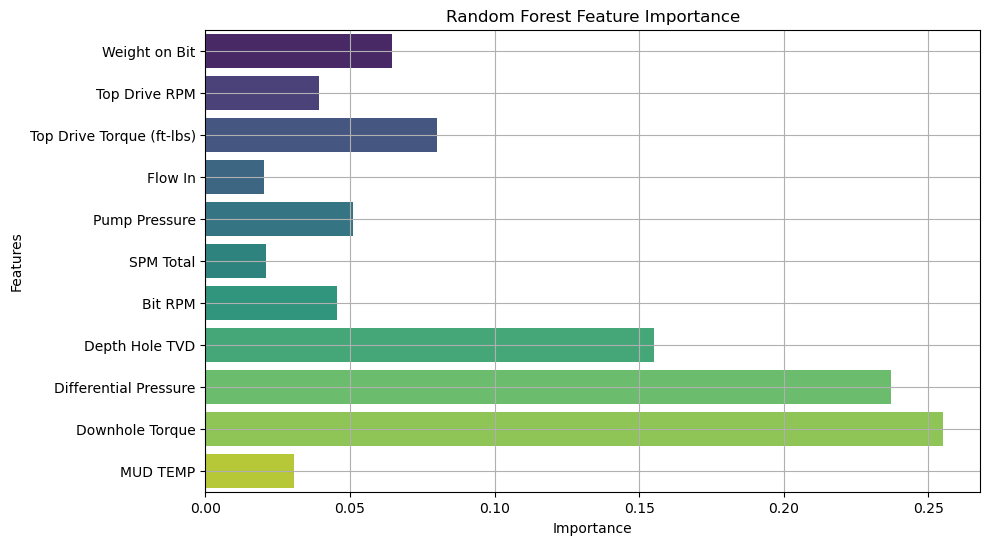

/var/folders/yw/z5q5_d9503l1qdll923f2s840000gn/T/ipykernel_27718/130183927.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance, y=features, palette='viridis')


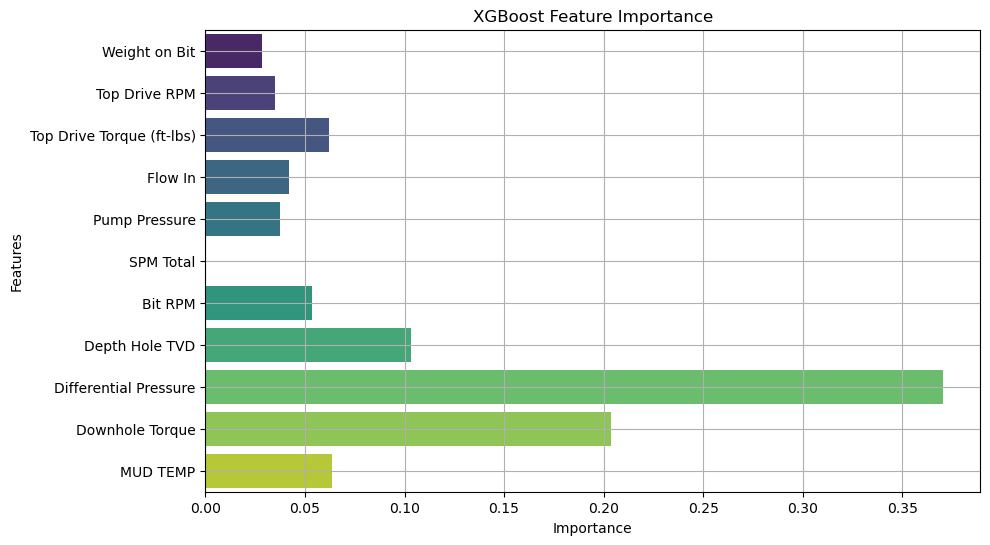

In [65]:
# Random Forest Feature Importance
rf_importance = rf_grid.best_estimator_.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance, y=features, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

# XGBoost Feature Importance
xgb_importance = xgb_grid.best_estimator_.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance, y=features, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

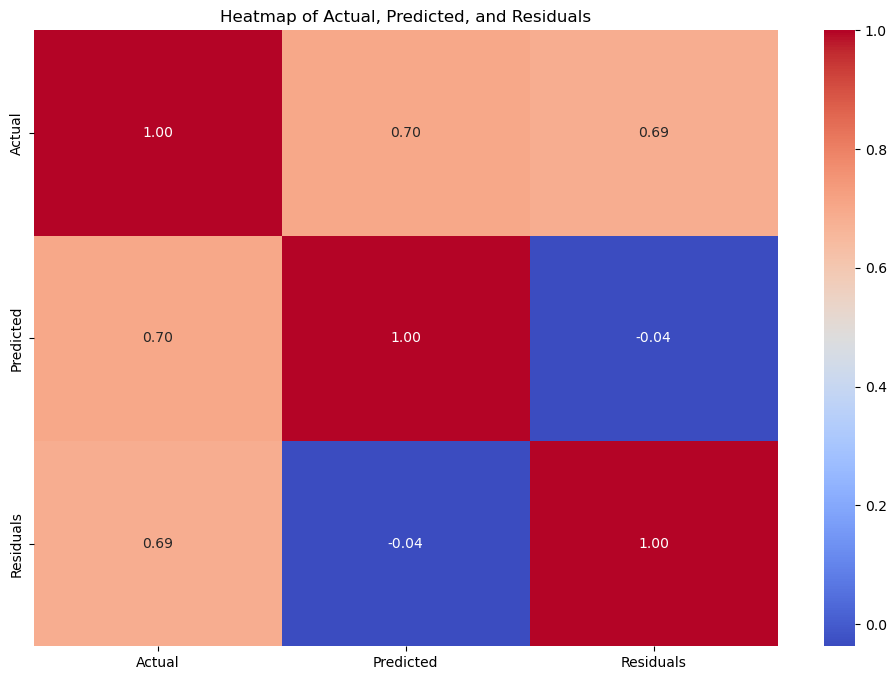

In [67]:
# Residuals for the stacking model
residuals_stack = y_test - stacking_meta_grid.best_estimator_.predict(X_test)

# Combine data for visualization
heatmap_data = pd.DataFrame({'Actual': y_test, 'Predicted': stacking_meta_grid.best_estimator_.predict(X_test), 'Residuals': residuals_stack})

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Actual, Predicted, and Residuals')
plt.show()

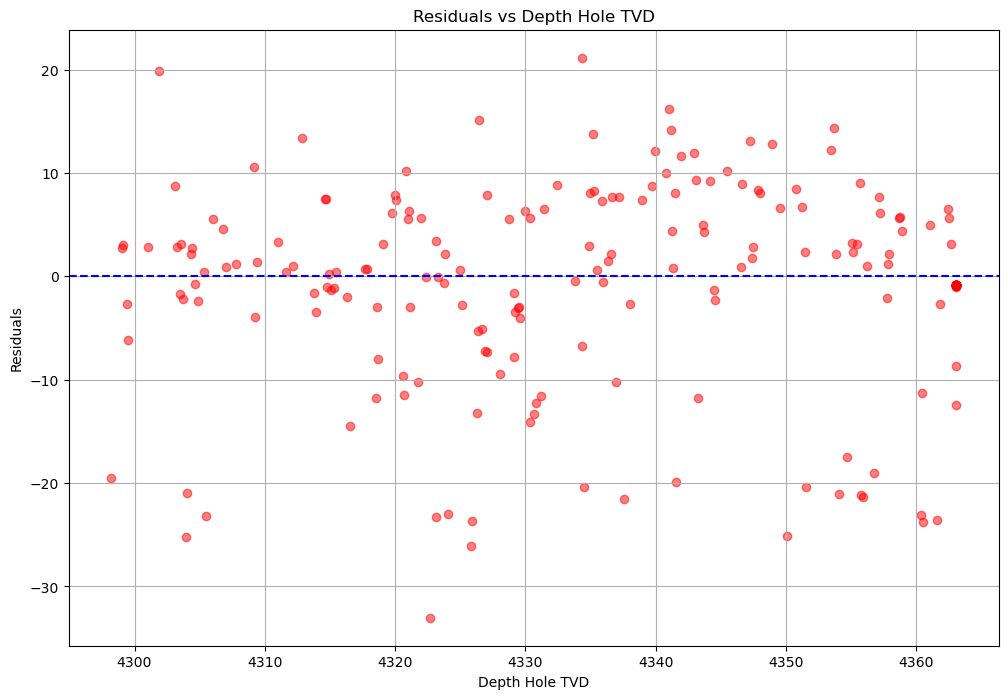

In [69]:
plt.figure(figsize=(12, 8))
plt.scatter(X_test['Depth Hole TVD'], residuals_stack, alpha=0.5, color='red')
plt.axhline(0, color='blue', linestyle='--')
plt.title('Residuals vs Depth Hole TVD')
plt.xlabel('Depth Hole TVD')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [71]:
# Evaluate Blending
mse_blend = mean_squared_error(y_test, y_pred_blended)
r2_blend = r2_score(y_test, y_pred_blended)

# Evaluate Stacking
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Print comparison
print("Comparison of Ensemble Methods:")
print(f"Blending: MSE = {mse_blend:.2f}, R² = {r2_blend:.2f}")
print(f"Stacking: MSE = {mse_stack:.2f}, R² = {r2_stack:.2f}")

Comparison of Ensemble Methods:
Blending: MSE = 99.60, R² = 0.49
Stacking: MSE = 100.23, R² = 0.49


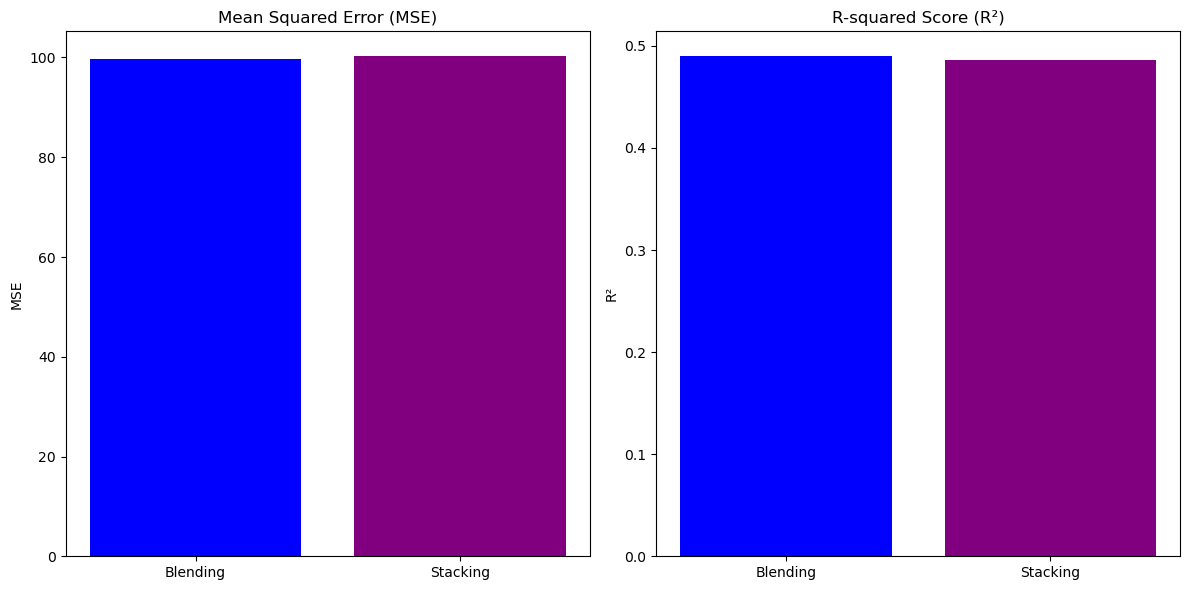

In [73]:
# Prepare data for comparison
methods = ['Blending', 'Stacking']
mse_scores = [mse_blend, mse_stack]
r2_scores = [r2_blend, r2_stack]

plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(methods, mse_scores, color=['blue', 'purple'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Plot R²
plt.subplot(1, 2, 2)
plt.bar(methods, r2_scores, color=['blue', 'purple'])
plt.title('R-squared Score (R²)')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

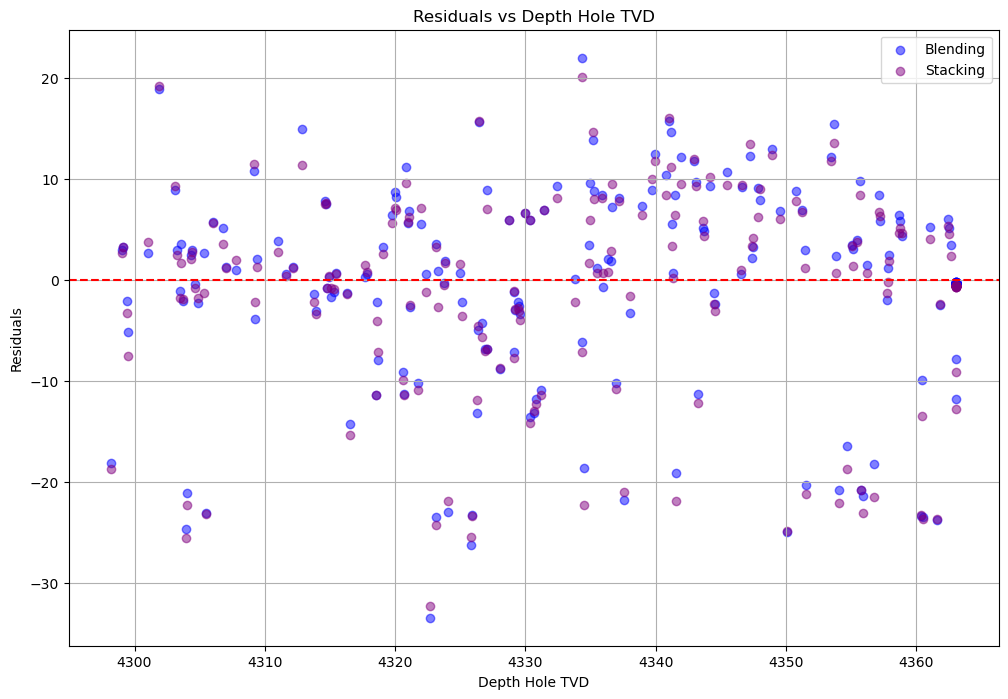

In [75]:
# Residuals
residuals_blend = y_test - y_pred_blended
residuals_stack = y_test - y_pred_stack

# Residuals vs Depth Hole TVD
plt.figure(figsize=(12, 8))
plt.scatter(X_test['Depth Hole TVD'], residuals_blend, alpha=0.5, color='blue', label='Blending')
plt.scatter(X_test['Depth Hole TVD'], residuals_stack, alpha=0.5, color='purple', label='Stacking')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Depth Hole TVD')
plt.xlabel('Depth Hole TVD')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

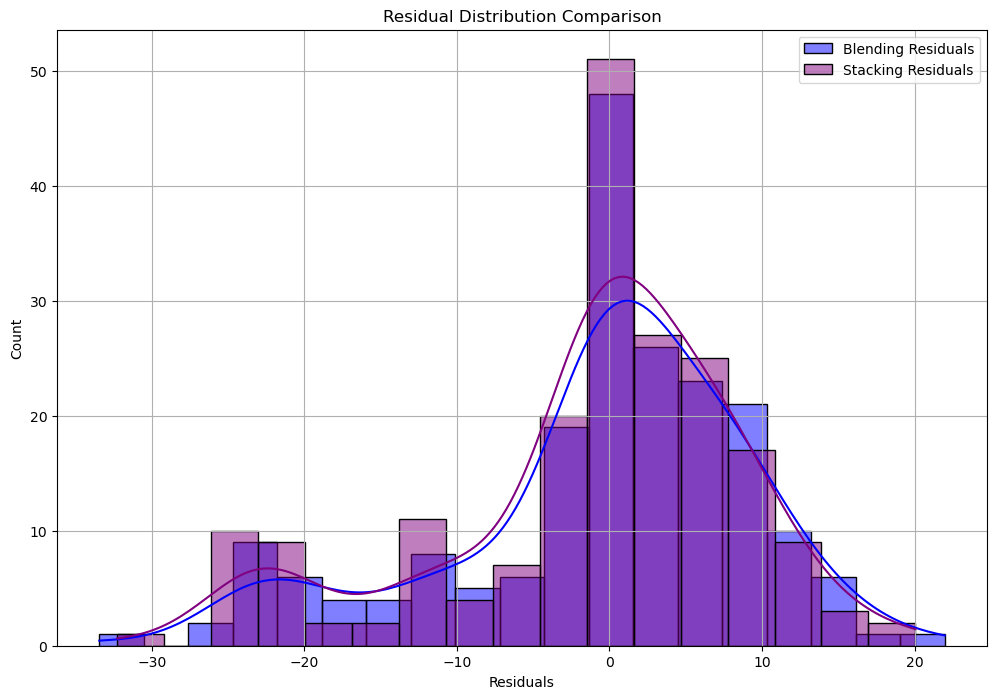

In [77]:
plt.figure(figsize=(12, 8))
sns.histplot(residuals_blend, kde=True, color='blue', label='Blending Residuals')
sns.histplot(residuals_stack, kde=True, color='purple', label='Stacking Residuals')
plt.title('Residual Distribution Comparison')
plt.xlabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [88]:
# Ensure X_train and X_test have the same feature columns
assert list(X_train.columns) == list(X_test.columns), "Feature mismatch between training and test data"

In [90]:
shap_values = explainer(X_test, check_additivity=False)

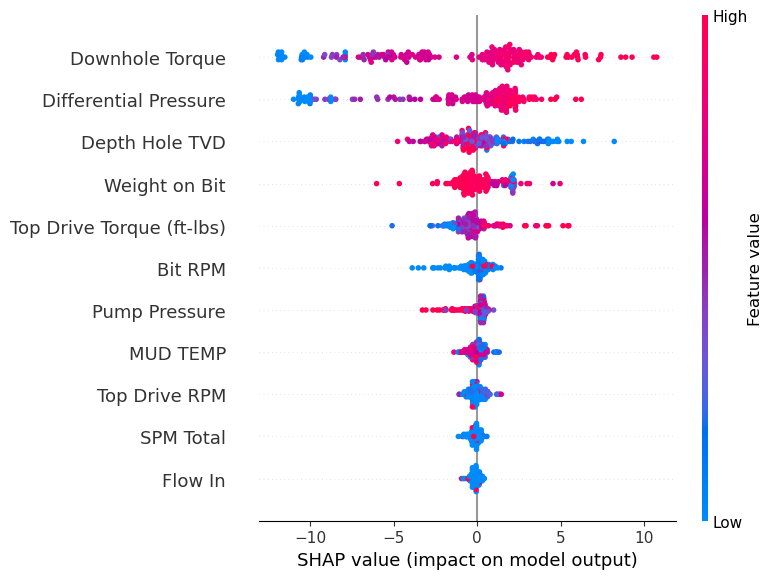

In [92]:
shap.summary_plot(shap_values, X_test)

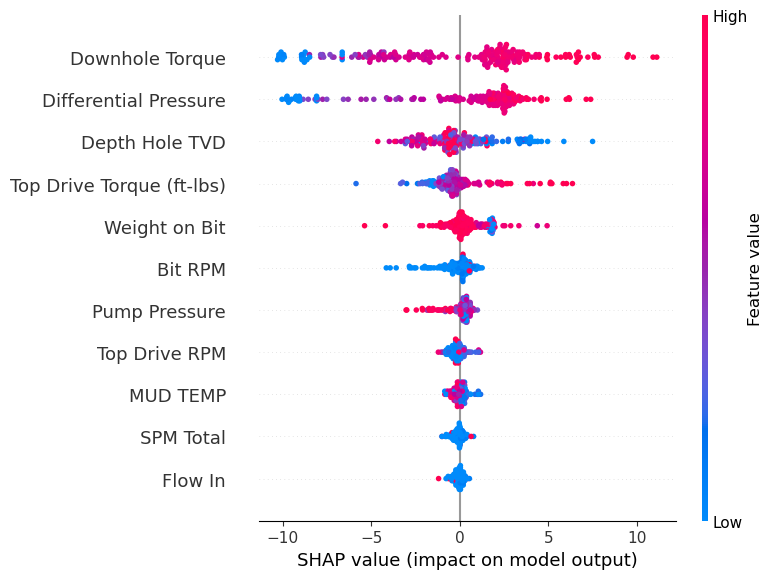

In [103]:
# Generate SHAP values for Random Forest model
explainer = shap.TreeExplainer(rf_grid.best_estimator_)  # Ensure best_estimator_ from GridSearchCV is used
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

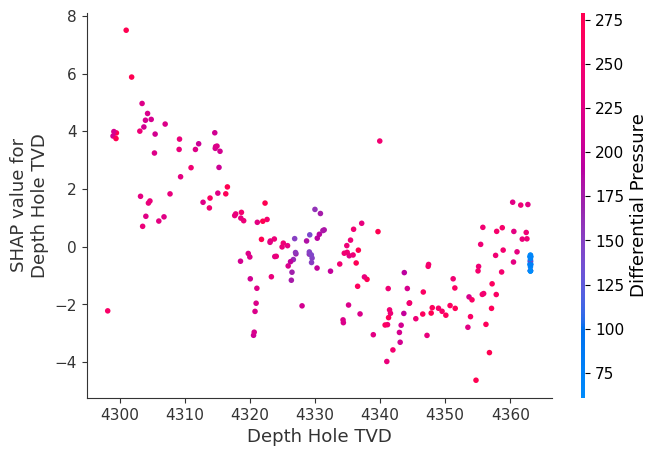

In [105]:
# Dependence plot for 'Depth Hole TVD'
shap.dependence_plot('Depth Hole TVD', shap_values, X_test)

In [107]:
# Compute residuals
residuals = y_test - rf_grid.best_estimator_.predict(X_test)

# Add residuals to SHAP values DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df['Residuals'] = residuals

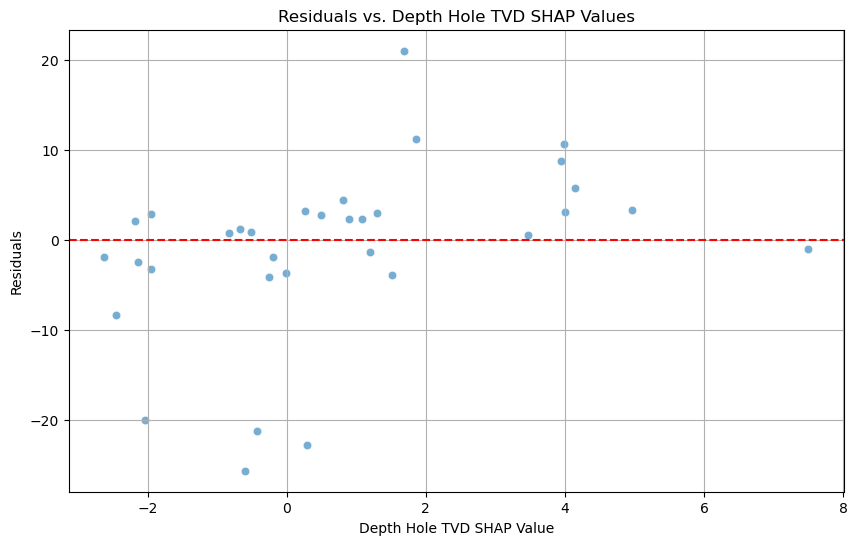

In [109]:
# Residuals vs. SHAP values for a key feature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shap_df, x='Depth Hole TVD', y='Residuals', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Depth Hole TVD SHAP Values')
plt.xlabel('Depth Hole TVD SHAP Value')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [111]:
X_train['Torque_Flow'] = X_train['Top Drive Torque (ft-lbs)'] * X_train['Flow In']
X_test['Torque_Flow'] = X_test['Top Drive Torque (ft-lbs)'] * X_test['Flow In']

In [113]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[['Depth Hole TVD']])
X_test_poly = poly.transform(X_test[['Depth Hole TVD']])

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['Pump Pressure']] = scaler.fit_transform(X_train[['Pump Pressure']])
X_test[['Pump Pressure']] = scaler.transform(X_test[['Pump Pressure']])

In [117]:
# Train Random Forest on refined features
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Refined Random Forest: MSE = {mse_rf:.2f}, R² = {r2_rf:.2f}")

Refined Random Forest: MSE = 102.39, R² = 0.48


In [119]:
# Train XGBoost on refined features
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Refined XGBoost: MSE = {mse_xgb:.2f}, R² = {r2_xgb:.2f}")

Refined XGBoost: MSE = 103.63, R² = 0.47
